In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
y_test_ligo_events = np.load('/kaggle/input/ligotestset/y_test_ligo.npy', allow_pickle=True)

In [3]:
data_info = np.load('/kaggle/input/segmentlabels/segmentlabels.npy', allow_pickle=True)
file_paths = [item[0] for item in data_info]
labels = [item[1] for item in data_info]

In [4]:
print(labels)

['Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise+BBH', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise+BBH', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise+BBH', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise+BBH', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise+BBH', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise+BBH', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise+BBH', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise', 'Noise',

In [5]:
label_to_index = {label: index for index, label in enumerate(np.unique(labels))}
y_test_ligo_events_encoded = np.array([label_to_index[label] for label in y_test_ligo_events])

num_classes = len(label_to_index)
y_test_ligo_events_encoded = to_categorical(y_test_ligo_events_encoded, num_classes=num_classes)

In [6]:
y_test_ligo_events_encoded = tf.convert_to_tensor(y_test_ligo_events_encoded, dtype=tf.float32)

In [7]:
test_data1 = np.load('/kaggle/input/testsetsrealligo/test_data1.npy')

In [8]:
import json
from tensorflow import keras

with open('/kaggle/input/bestmodel/model.json', 'r') as json_file:
    model_json = json_file.read()
    model = keras.models.model_from_json(model_json)

model.load_weights('/kaggle/input/bestmodel/model_weights.h5')

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
test_loss, test_acc = model.evaluate(test_data1, y_test_ligo_events_encoded)
print(f'Test accuracy: {test_acc}')

51/51 [==============================] - 7s 13ms/step - loss: 23.0685 - accuracy: 0.3082
Test accuracy: 0.3082107901573181


In [11]:
model1_pred = model.predict(test_data1)
model1_predicted_labels = np.argmax(model1_pred, axis=1)

51/51 [==============================] - 1s 11ms/step


In [12]:
y_test_single_label = np.argmax(y_test_ligo_events_encoded, axis=1)

In [13]:
report = classification_report(y_test_single_label, model1_predicted_labels, zero_division=1)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.32      0.48      1517
           1       0.17      0.07      0.10        95
           2       0.01      1.00      0.01         3
           3       0.02      0.65      0.04        17

    accuracy                           0.31      1632
   macro avg       0.29      0.51      0.16      1632
weighted avg       0.90      0.31      0.45      1632



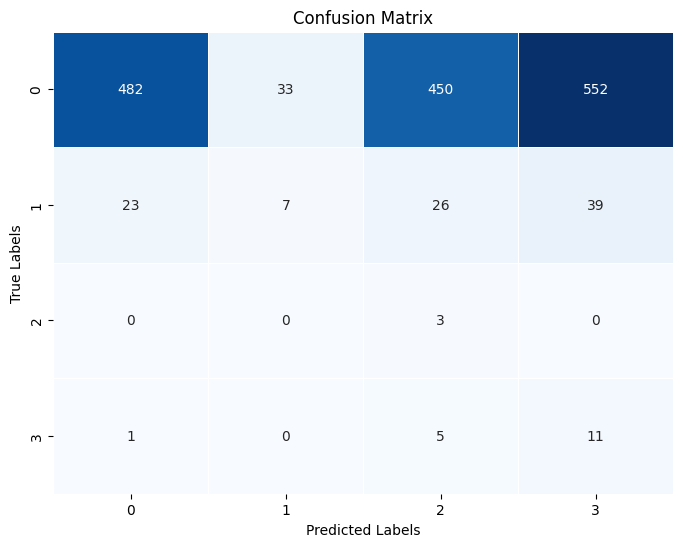

In [14]:
cm = confusion_matrix(y_test_single_label, model1_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
test_data2 = np.load('/kaggle/input/testsetsrealligo/test_data2.npy')

In [16]:
import json
from tensorflow import keras

with open('/kaggle/input/bestmodel/model.json', 'r') as json_file:
    model_json = json_file.read()
    model = keras.models.model_from_json(model_json)

model.load_weights('/kaggle/input/bestmodel/model_weights.h5')

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
test_loss, test_acc = model.evaluate(test_data2, y_test_ligo_events_encoded)
print(f'Test accuracy: {test_acc}')

51/51 [==============================] - 2s 13ms/step - loss: 334.3885 - accuracy: 0.0521
Test accuracy: 0.0520833320915699


In [19]:
model2_pred = model.predict(test_data2)
model2_predicted_labels = np.argmax(model2_pred, axis=1)

51/51 [==============================] - 1s 11ms/step


In [20]:
report = classification_report(y_test_single_label, model2_predicted_labels, zero_division=1)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.00      0.01      1517
           1       0.06      0.79      0.11        95
           2       0.00      0.00      0.00         3
           3       0.01      0.29      0.03        17

    accuracy                           0.05      1632
   macro avg       0.23      0.27      0.04      1632
weighted avg       0.78      0.05      0.01      1632



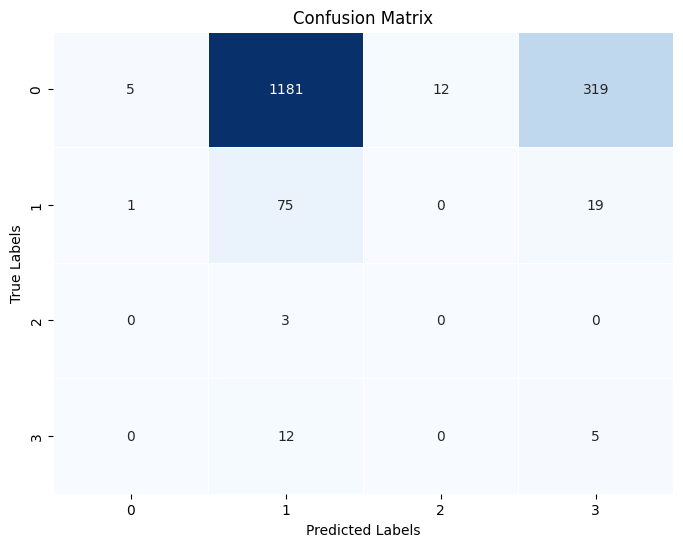

In [21]:
cm = confusion_matrix(y_test_single_label, model2_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import json
from tensorflow import keras

with open('/kaggle/input/model2/model2.json', 'r') as json_file:
    model_json = json_file.read()
    model = keras.models.model_from_json(model_json)

model.load_weights('/kaggle/input/model2/model_weights2.h5')

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
test_loss, test_acc = model.evaluate(test_data2, y_test_ligo_events_encoded)
print(f'Test accuracy: {test_acc}')

51/51 [==============================] - 2s 13ms/step - loss: 100.9339 - accuracy: 0.0472
Test accuracy: 0.047181371599435806


In [25]:
model3_pred = model.predict(test_data2)
model3_predicted_labels = np.argmax(model3_pred, axis=1)

51/51 [==============================] - 1s 11ms/step


In [26]:
report = classification_report(y_test_single_label, model3_predicted_labels, zero_division=1)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.00      0.00      1517
           1       0.06      0.68      0.11        95
           2       0.00      0.00      0.00         3
           3       0.02      0.59      0.04        17

    accuracy                           0.05      1632
   macro avg       0.19      0.32      0.04      1632
weighted avg       0.62      0.05      0.01      1632



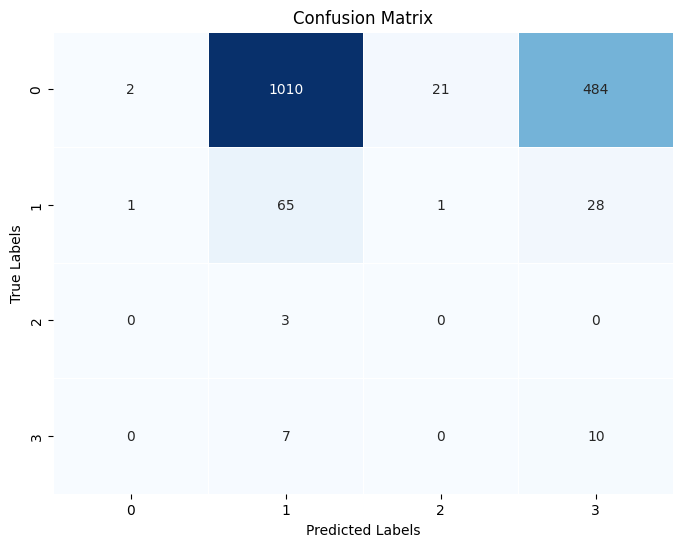

In [27]:
cm = confusion_matrix(y_test_single_label, model3_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
test_data3 = np.load('/kaggle/input/testsetsrealligo/test_data3.npy')

In [29]:
import json
from tensorflow import keras

with open('/kaggle/input/bestmodel/model.json', 'r') as json_file:
    model_json = json_file.read()
    model = keras.models.model_from_json(model_json)

model.load_weights('/kaggle/input/bestmodel/model_weights.h5')

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
test_loss, test_acc = model.evaluate(test_data3, y_test_ligo_events_encoded)
print(f'Test accuracy: {test_acc}')

51/51 [==============================] - 2s 13ms/step - loss: 7.9757 - accuracy: 0.9295
Test accuracy: 0.9295343160629272


In [32]:
model4_pred = model.predict(test_data3)
model4_predicted_labels = np.argmax(model4_pred, axis=1)

51/51 [==============================] - 1s 11ms/step


In [33]:
report = classification_report(y_test_single_label, model4_predicted_labels, zero_division=1)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1517
           1       1.00      0.00      0.00        95
           2       1.00      0.00      0.00         3
           3       1.00      0.00      0.00        17

    accuracy                           0.93      1632
   macro avg       0.98      0.25      0.24      1632
weighted avg       0.93      0.93      0.90      1632



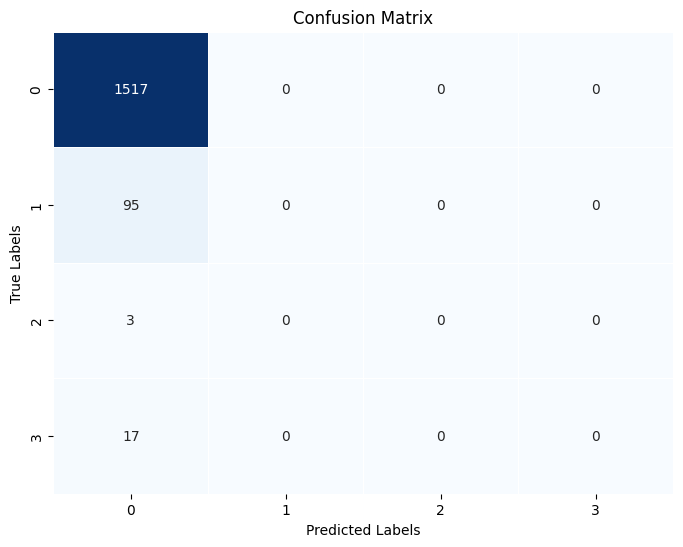

In [34]:
cm = confusion_matrix(y_test_single_label, model4_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn.metrics import f1_score, classification_report

model1_classes = [2, 3]
model2_classes = [1, 3]
model3_classes = [1, 3]
model4_classes = [0]

model1_weight = 1.0  
model2_weight = 1.0
model3_weight = 1.0
model4_weight = 1.0

final_predictions = []

for i in range(len(test_data1)):
    class_label = y_test_single_label[i]

    if class_label in model1_classes:
        prediction = model1_pred[i] * model1_weight
    else:
        prediction = 0  

    if class_label in model2_classes:
        prediction += model2_pred[i] * model2_weight
    else:
        prediction += 0  

    if class_label in model3_classes:
        prediction += model3_pred[i] * model3_weight
    else:
        prediction += 0  

    if class_label in model4_classes:
        prediction += model4_pred[i] * model4_weight
    else:
        prediction += 0  

    final_predictions.append(prediction)

final_predictions = np.argmax(final_predictions, axis=1)

report = classification_report(y_test_single_label, final_predictions)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1517
           1       0.92      0.82      0.87        95
           2       1.00      1.00      1.00         3
           3       0.38      0.59      0.47        17

    accuracy                           0.99      1632
   macro avg       0.83      0.85      0.83      1632
weighted avg       0.99      0.99      0.99      1632



In [36]:
import pickle

ensemble_model = {
    'model1_classes': model1_classes,
    'model2_classes': model2_classes,
    'model3_classes': model3_classes,
    'model4_classes': model4_classes,
    'model1_weight': model1_weight,
    'model2_weight': model2_weight,
    'model3_weight': model3_weight,
    'model4_weight': model4_weight,
}

with open('ensemble_model.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model, model_file)


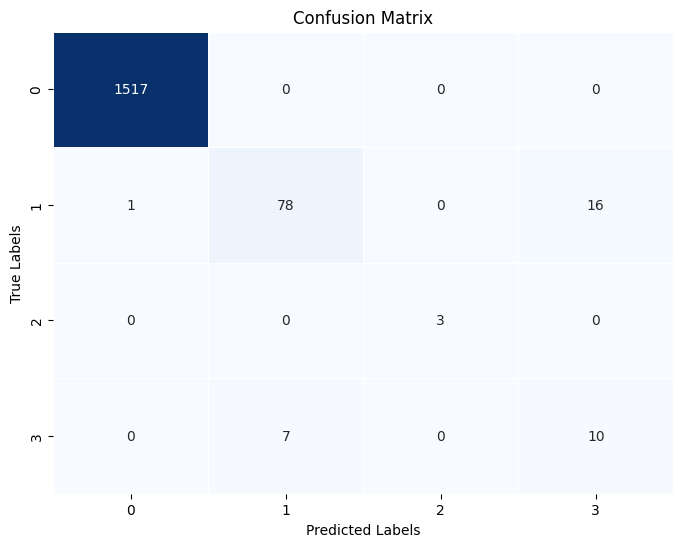

In [37]:
true_labels = y_test_single_label
predicted_labels = final_predictions

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [38]:
class_labels = ["Noise", "Noise+BBH", "Noise+BNS", "Noise+NSBH"]

correctly_classified_samples = {
    "Noise": 0,
    "Noise+BBH": 0,
    "Noise+BNS": 0,
    "Noise+NSBH": 0,
}

for true_label, ensemble_label in zip(y_test_single_label, final_predictions):
    if true_label == ensemble_label:
        class_name = class_labels[true_label]
        correctly_classified_samples[class_name] += 1

for class_name, count in correctly_classified_samples.items():
    print(f"Correctly classified {class_name} samples: {count}")



Correctly classified Noise samples: 1517
Correctly classified Noise+BBH samples: 78
Correctly classified Noise+BNS samples: 3
Correctly classified Noise+NSBH samples: 10


In [39]:
correctly_classified_info = []

classes_to_include = [1, 2, 3]

for i, (true_label, ensemble_label) in enumerate(zip(y_test_single_label, final_predictions)):
    if true_label in classes_to_include and true_label == ensemble_label:
        class_name = class_labels[true_label]  
        correctly_classified_info.append((i, class_name))

for i, (idx, class_name) in enumerate(correctly_classified_info):
    print(f"Sample {idx + 1} is correctly classified as {class_name}.")


Sample 6 is correctly classified as Noise+BBH.
Sample 22 is correctly classified as Noise+BBH.
Sample 38 is correctly classified as Noise+BBH.
Sample 54 is correctly classified as Noise+BBH.
Sample 70 is correctly classified as Noise+BBH.
Sample 86 is correctly classified as Noise+BBH.
Sample 102 is correctly classified as Noise+BBH.
Sample 117 is correctly classified as Noise+BBH.
Sample 118 is correctly classified as Noise+BBH.
Sample 134 is correctly classified as Noise+BBH.
Sample 150 is correctly classified as Noise+BBH.
Sample 169 is correctly classified as Noise+BBH.
Sample 182 is correctly classified as Noise+BBH.
Sample 214 is correctly classified as Noise+BBH.
Sample 247 is correctly classified as Noise+BNS.
Sample 278 is correctly classified as Noise+BBH.
Sample 310 is correctly classified as Noise+BBH.
Sample 326 is correctly classified as Noise+BBH.
Sample 342 is correctly classified as Noise+BBH.
Sample 358 is correctly classified as Noise+BBH.
Sample 374 is correctly cla

197
229
261
293
581
741
853
912
965
1024
1040
1062
1189
1232
1233
1248
1301
1317
1334
1477
1525
1589
1605
1616


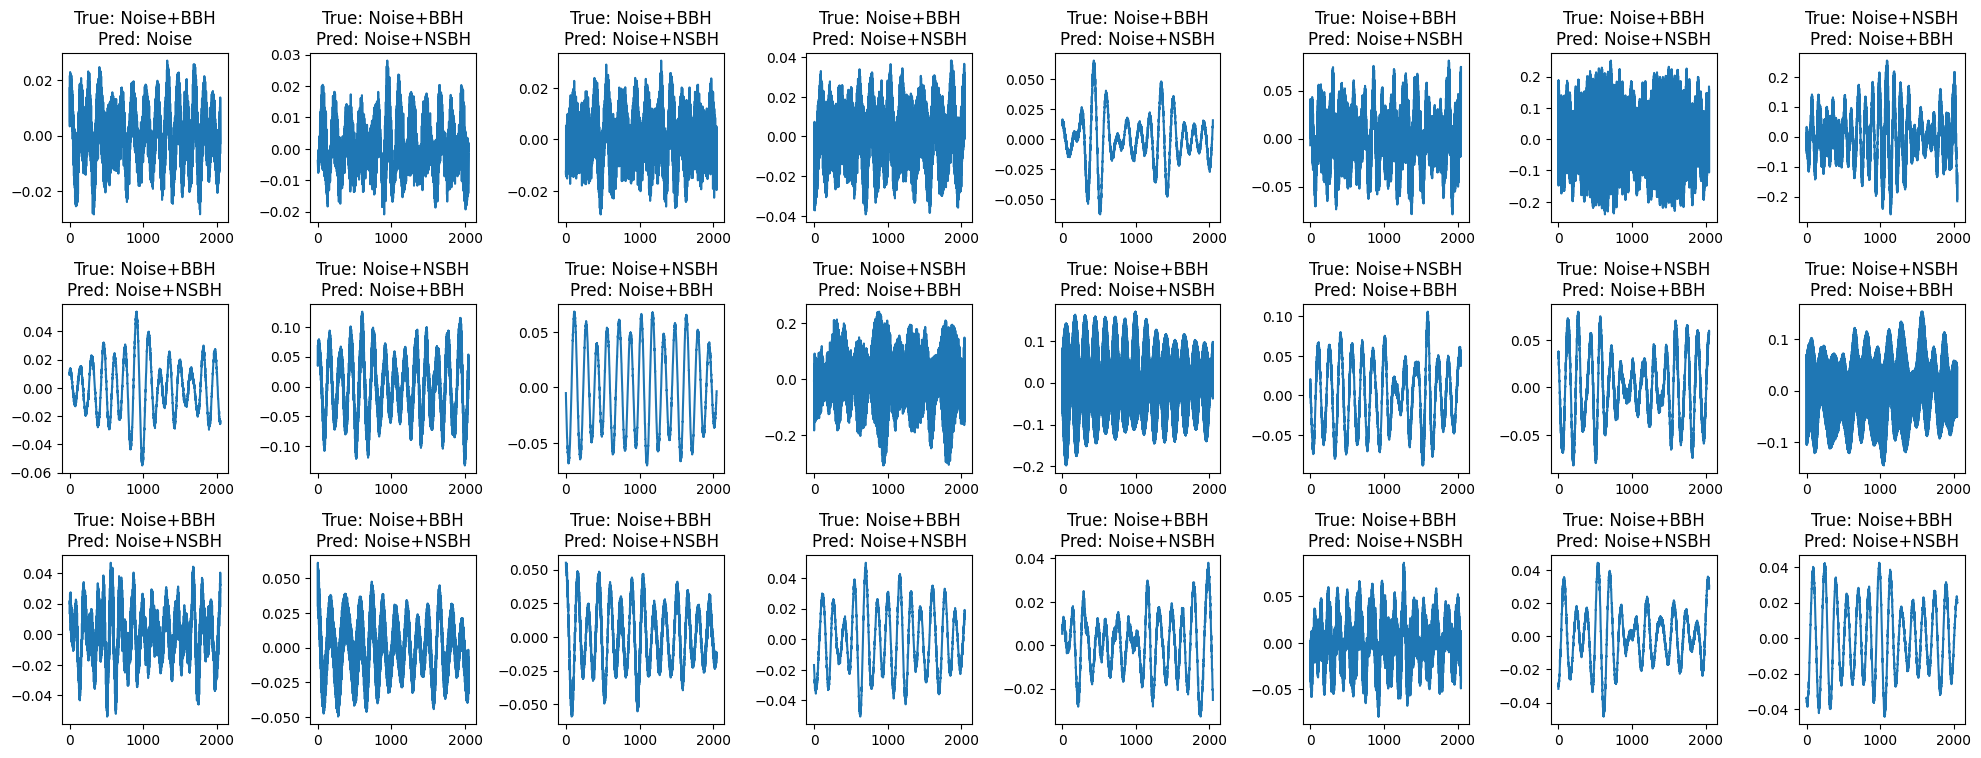

In [40]:
import matplotlib.pyplot as plt
import numpy as np

incorrectly_classified_info = []

classes_to_include = [1, 2, 3]

for i, (true_label, ensemble_label) in enumerate(zip(y_test_single_label, final_predictions)):
    if true_label in classes_to_include and true_label != ensemble_label:
        true_class_name = class_labels[true_label]  
        predicted_class_name = class_labels[ensemble_label]  
        incorrectly_classified_info.append((i, true_class_name, predicted_class_name))

plt.figure(figsize=(20, 20))

num_rows = 8
num_cols = 8

num_samples_to_plot = min(len(incorrectly_classified_info), num_rows * num_cols)

def plot_signal(signal, title, ax):
    ax.plot(signal)
    ax.set_title(title)

for i in range(num_samples_to_plot):
    idx, true_class_name, predicted_class_name = incorrectly_classified_info[i]
    signal_data = test_data1[idx]  
    print(idx)
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plot_signal(signal_data, f"True: {true_class_name}\nPred: {predicted_class_name}", ax)

plt.tight_layout()
plt.show()


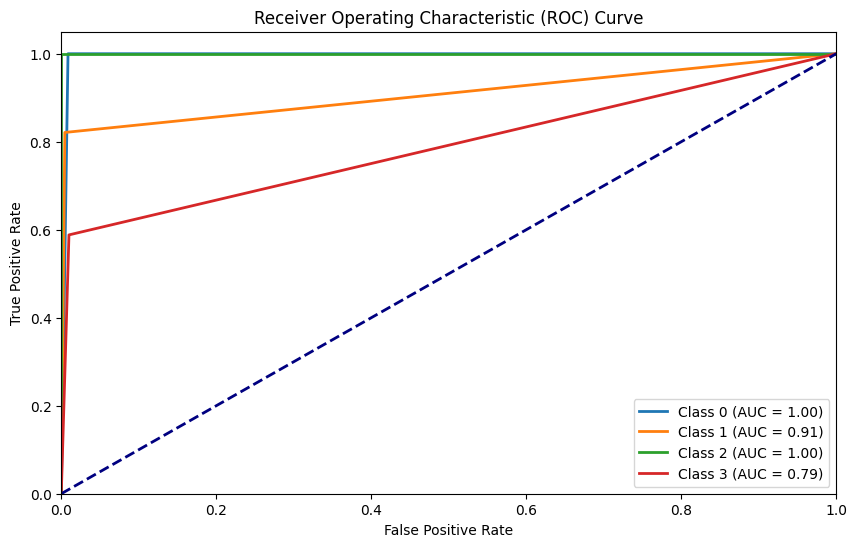

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

classes_to_include = [0, 1, 2, 3]

for class_label in classes_to_include:
    fpr, tpr, _ = roc_curve(y_test_single_label == class_label, final_predictions == class_label)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [42]:
#data augmentation

In [43]:
test_data1_augm = np.load('/kaggle/input/augmtestsetsligo/testdata1_augm.npy')

In [44]:
import json
from tensorflow import keras

with open('/kaggle/input/bestmodel/model.json', 'r') as json_file:
    model_json = json_file.read()
    model = keras.models.model_from_json(model_json)

model.load_weights('/kaggle/input/bestmodel/model_weights.h5')

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
test_loss, test_acc = model.evaluate(test_data1_augm, y_test_ligo_events_encoded)
print(f'Test accuracy: {test_acc}')

51/51 [==============================] - 2s 13ms/step - loss: 20.8772 - accuracy: 0.3321
Test accuracy: 0.3321078419685364


In [47]:
model1_pred_augm = model.predict(test_data1_augm)
model1_predicted_labels = np.argmax(model1_pred_augm, axis=1)

51/51 [==============================] - 1s 11ms/step


In [48]:
report = classification_report(y_test_single_label, model1_predicted_labels, zero_division=1)

print("Classification Report:\n", report)
cm = confusion_matrix(y_test_single_label, model1_predicted_labels)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.34      0.51      1517
           1       0.18      0.07      0.11        95
           2       0.00      0.67      0.01         3
           3       0.02      0.59      0.04        17

    accuracy                           0.33      1632
   macro avg       0.29      0.42      0.16      1632
weighted avg       0.90      0.33      0.48      1632



In [49]:
test_data2_augm = np.load('/kaggle/input/augmtestsetsligo/testdata2_augm.npy')

In [50]:
import json
from tensorflow import keras

with open('/kaggle/input/bestmodel/model.json', 'r') as json_file:
    model_json = json_file.read()
    model = keras.models.model_from_json(model_json)

model.load_weights('/kaggle/input/bestmodel/model_weights.h5')

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
test_loss, test_acc = model.evaluate(test_data2_augm, y_test_ligo_events_encoded)
print(f'Test accuracy: {test_acc}')

51/51 [==============================] - 2s 13ms/step - loss: 336.1790 - accuracy: 0.0521
Test accuracy: 0.0520833320915699


In [53]:
model2_pred_augm = model.predict(test_data2_augm)
model2_predicted_labels = np.argmax(model2_pred_augm, axis=1)

51/51 [==============================] - 1s 11ms/step


In [54]:
report = classification_report(y_test_single_label, model2_predicted_labels, zero_division=1)

print("Classification Report:\n", report)
cm = confusion_matrix(y_test_single_label, model2_predicted_labels)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.00      0.01      1517
           1       0.06      0.78      0.11        95
           2       0.00      0.00      0.00         3
           3       0.01      0.29      0.03        17

    accuracy                           0.05      1632
   macro avg       0.23      0.27      0.04      1632
weighted avg       0.80      0.05      0.01      1632



In [55]:
import json
from tensorflow import keras

with open('/kaggle/input/model2/model2.json', 'r') as json_file:
    model_json = json_file.read()
    model = keras.models.model_from_json(model_json)

model.load_weights('/kaggle/input/model2/model_weights2.h5')

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
test_loss, test_acc = model.evaluate(test_data2_augm, y_test_ligo_events_encoded)
print(f'Test accuracy: {test_acc}')

51/51 [==============================] - 2s 14ms/step - loss: 99.1774 - accuracy: 0.0490
Test accuracy: 0.04901960864663124


In [58]:
model3_pred_augm = model.predict(test_data2_augm)
model3_predicted_labels = np.argmax(model3_pred_augm, axis=1)

51/51 [==============================] - 1s 11ms/step


In [59]:
report = classification_report(y_test_single_label, model3_predicted_labels, zero_division=1)

print("Classification Report:\n", report)
cm = confusion_matrix(y_test_single_label, model3_predicted_labels)

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.00      0.01      1517
           1       0.06      0.68      0.11        95
           2       0.00      0.00      0.00         3
           3       0.02      0.59      0.04        17

    accuracy                           0.05      1632
   macro avg       0.18      0.32      0.04      1632
weighted avg       0.58      0.05      0.01      1632



In [60]:
test_data3_augm = np.load('/kaggle/input/augmtestsetsligo/testdata3_augm.npy')

In [61]:
import json
from tensorflow import keras

with open('/kaggle/input/bestmodel/model.json', 'r') as json_file:
    model_json = json_file.read()
    model = keras.models.model_from_json(model_json)

model.load_weights('/kaggle/input/bestmodel/model_weights.h5')

In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
test_loss, test_acc = model.evaluate(test_data3_augm, y_test_ligo_events_encoded)
print(f'Test accuracy: {test_acc}')

51/51 [==============================] - 1s 13ms/step - loss: 7.9757 - accuracy: 0.9295
Test accuracy: 0.9295343160629272


In [64]:
model4_pred_augm = model.predict(test_data3_augm)
model4_predicted_labels = np.argmax(model4_pred_augm, axis=1)

51/51 [==============================] - 1s 11ms/step


In [65]:
report = classification_report(y_test_single_label, model4_predicted_labels, zero_division=1)

print("Classification Report:\n", report)
cm = confusion_matrix(y_test_single_label, model4_predicted_labels)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1517
           1       1.00      0.00      0.00        95
           2       1.00      0.00      0.00         3
           3       1.00      0.00      0.00        17

    accuracy                           0.93      1632
   macro avg       0.98      0.25      0.24      1632
weighted avg       0.93      0.93      0.90      1632



In [66]:
from sklearn.metrics import f1_score, classification_report

model1_classes = [2, 3]
model2_classes = [1, 3]
model3_classes = [1, 3]
model4_classes = [0]

model1_weight = 1.0  
model2_weight = 1.0
model3_weight = 1.0
model4_weight = 1.0

final_predictions = []

for i in range(len(test_data1)):
    class_label = y_test_single_label[i]

    if class_label in model1_classes:
        prediction = model1_pred_augm[i] * model1_weight
    else:
        prediction = 0  

    if class_label in model2_classes:
        prediction += model2_pred_augm[i] * model2_weight
    else:
        prediction += 0  

    if class_label in model3_classes:
        prediction += model3_pred_augm[i] * model3_weight
    else:
        prediction += 0  

    if class_label in model4_classes:
        prediction += model4_pred_augm[i] * model4_weight
    else:
        prediction += 0  

    final_predictions.append(prediction)

final_predictions = np.argmax(final_predictions, axis=1)

report = classification_report(y_test_single_label, final_predictions)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1517
           1       0.92      0.81      0.86        95
           2       1.00      0.67      0.80         3
           3       0.38      0.59      0.47        17

    accuracy                           0.98      1632
   macro avg       0.82      0.77      0.78      1632
weighted avg       0.99      0.98      0.99      1632



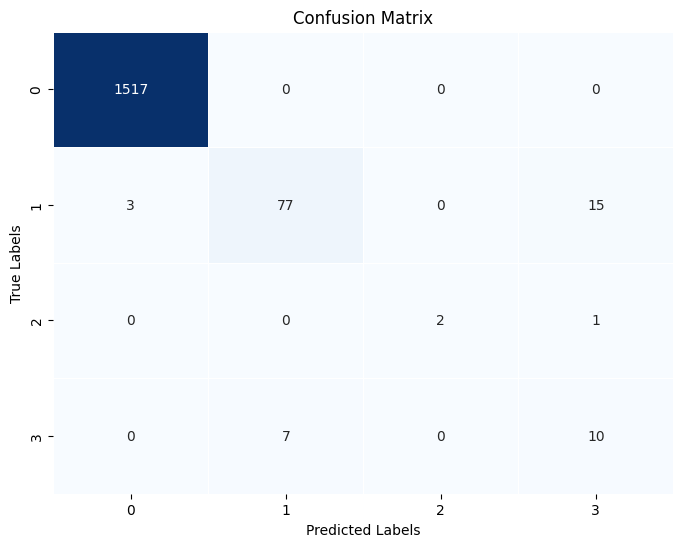

In [67]:
true_labels = y_test_single_label
predicted_labels = final_predictions

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [68]:
class_labels = ["Noise", "Noise+BBH", "Noise+BNS", "Noise+NSBH"]

correctly_classified_samples = {
    "Noise": 0,
    "Noise+BBH": 0,
    "Noise+BNS": 0,
    "Noise+NSBH": 0,
}

for true_label, ensemble_label in zip(y_test_single_label, final_predictions):
    if true_label == ensemble_label:
        class_name = class_labels[true_label]
        correctly_classified_samples[class_name] += 1

for class_name, count in correctly_classified_samples.items():
    print(f"Correctly classified {class_name} samples: {count}")

Correctly classified Noise samples: 1517
Correctly classified Noise+BBH samples: 77
Correctly classified Noise+BNS samples: 2
Correctly classified Noise+NSBH samples: 10


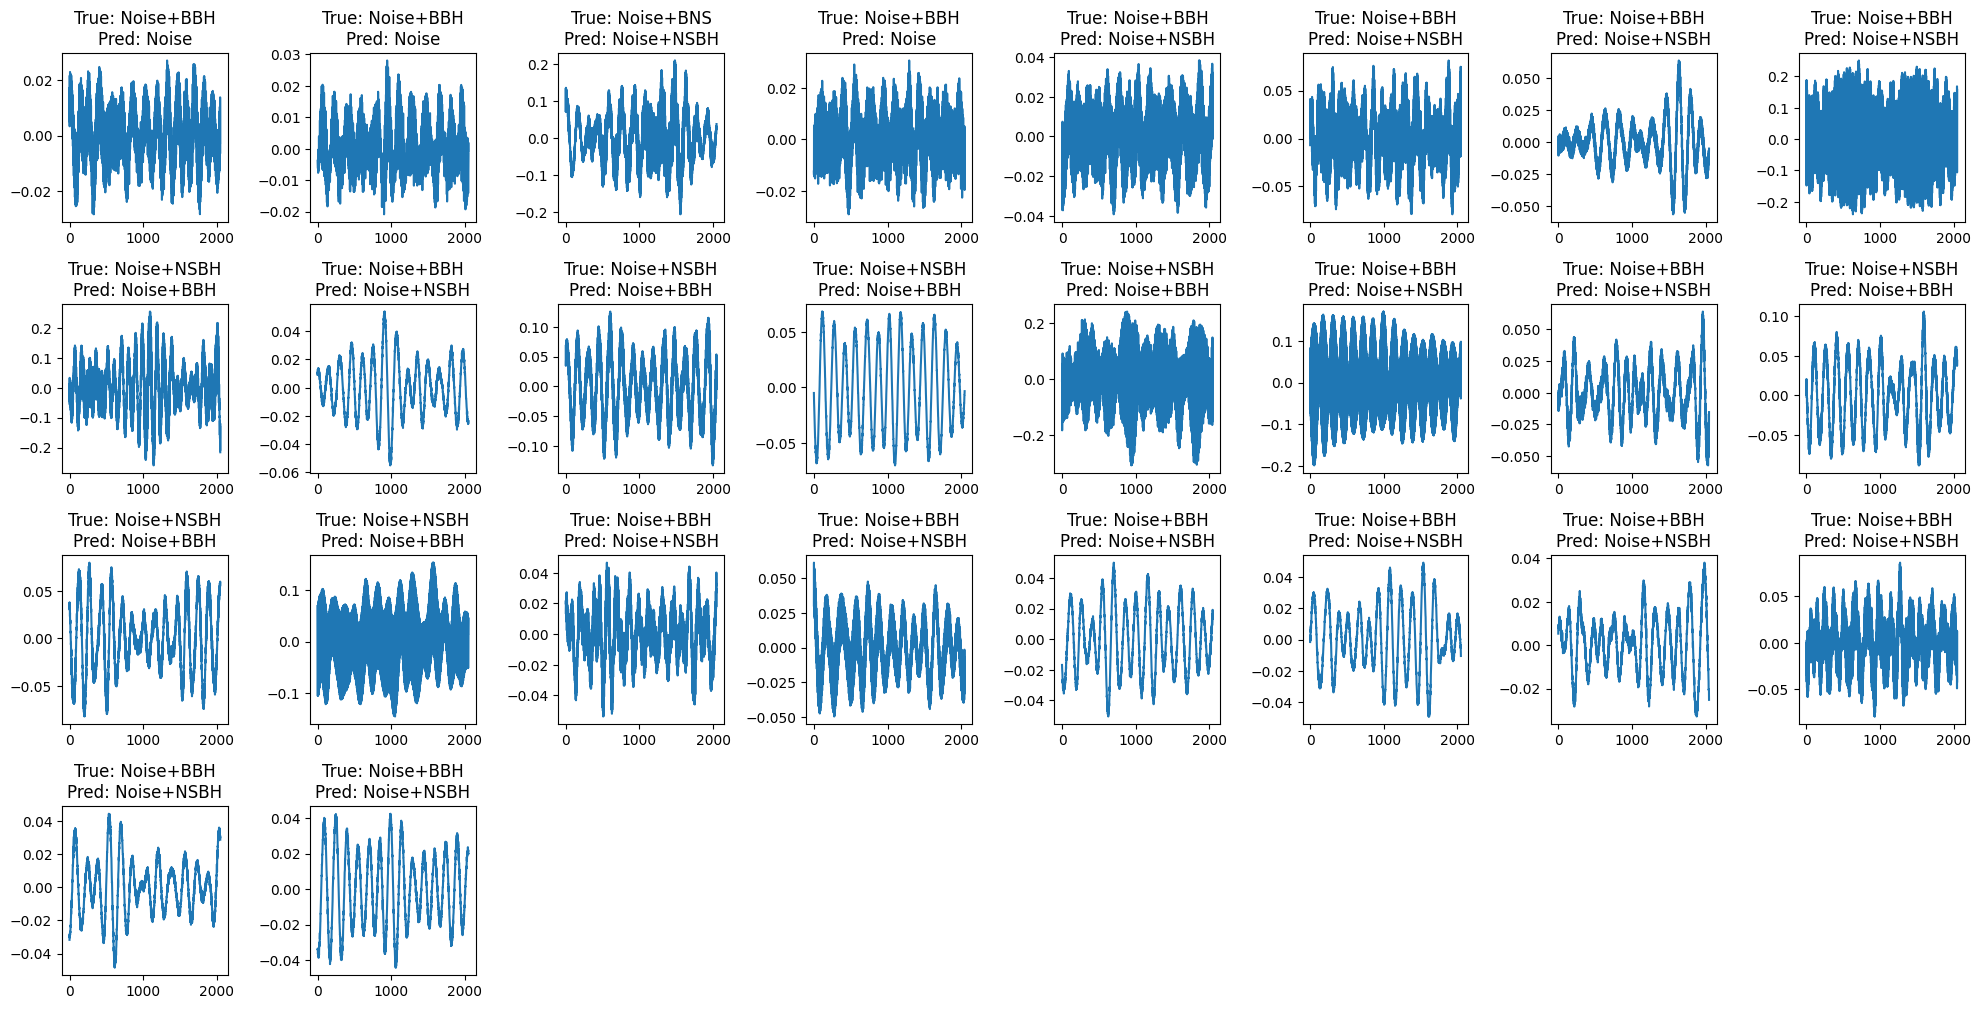

In [69]:
import matplotlib.pyplot as plt
import numpy as np

incorrectly_classified_info = []

classes_to_include = [1, 2, 3]

for i, (true_label, ensemble_label) in enumerate(zip(y_test_single_label, final_predictions)):
    if true_label in classes_to_include and true_label != ensemble_label:
        true_class_name = class_labels[true_label]  
        predicted_class_name = class_labels[ensemble_label]  
        incorrectly_classified_info.append((i, true_class_name, predicted_class_name))

plt.figure(figsize=(20, 20))

num_rows = 8
num_cols = 8

num_samples_to_plot = min(len(incorrectly_classified_info), num_rows * num_cols)

def plot_signal(signal, title, ax):
    ax.plot(signal)
    ax.set_title(title)

for i in range(num_samples_to_plot):
    idx, true_class_name, predicted_class_name = incorrectly_classified_info[i]
    signal_data = test_data1[idx]  # Replace with your signal data
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plot_signal(signal_data, f"True: {true_class_name}\nPred: {predicted_class_name}", ax)

plt.tight_layout()
plt.show()